#<h1> Question 1 </h1> 

#<h3>Question 1a</h3>

In [ ]:
import pandas as pd #import dependencies
import numpy as np
import seaborn as sb
from matplotlib import pyplot
import matplotlib
from math import log10

In [ ]:
df=pd.read_csv('master.csv') #read csv into pandas dataframe
display(df)
print('Rows : ',df.shape[0],'Columns : ',df.shape[1],'\n') #print no of rows and columns
df.dtypes #datatypes

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


Rows :  27820 Columns :  12 



country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [ ]:
df[' gdp_for_year ($) ']=df[' gdp_for_year ($) '].str.replace(',','') #replace commas with empty string
df[' gdp_for_year ($) ']=df[' gdp_for_year ($) '].astype(int) #convert string to int
#df['country-year']=df['country-year'].str.slice(0,-4)
display(df)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,63067077179,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,63067077179,2309,Generation Z


~Renamed Country-Year to just country so we can later group data based on country , no data is lost as year is a separate field~ GDP for the year was given in a format seperated by commas , converted it to int data type so arithmetic can be performed if need be 

In [ ]:
print('For each column the first line lists Null and Unique Values respectively')
print('The second line represents extreme values')
for col in df.columns:
  print(col,' : ',df[col].isnull().sum(),len(df[col].unique())) #number of null values and number of unique values
  print(col,df[col].max(),df[col].min(),'\n') #minimum and maxiumum of a column

For each column the first line lists Null and Unique Values respectively
The second line represents extreme values
country  :  0 101
country Uzbekistan Albania 

year  :  0 32
year 2016 1985 

sex  :  0 2
sex male female 

age  :  0 6
age 75+ years 15-24 years 

suicides_no  :  0 2084
suicides_no 22338 0 

population  :  0 25564
population 43805214 278 

suicides/100k pop  :  0 5298
suicides/100k pop 224.97 0.0 

country-year  :  0 2321
country-year Uzbekistan2014 Albania1987 

HDI for year  :  19456 306
HDI for year 0.944 0.483 

 gdp_for_year ($)   :  0 2321
 gdp_for_year ($)  18120714000000 46919625 

gdp_per_capita ($)  :  0 2233
gdp_per_capita ($) 126352 251 

generation  :  0 6
generation Silent Boomers 



<br> Data is for 101 countries and spread over 32 years. However from the unique number of _country-year_ we can see that if the data for each year was available for each country we would have `101*32=3232` unique values instead of 2321</br>
<br> Similarly some data is missing based on gender and age group as ideally there should be `2321*2*6=27852` rows but we have 27820 rows </br>
<br>HDI per year is empty for a lot of rows</br>

#<h3>Question 1b</h3>

In [ ]:
for col in df.columns:
  print(col)
  print(df[col].mode()) #mode of the column 
  print('Frequency',df[col].value_counts().max()) #the frequency which corresponds to mode

country
0        Austria
1        Iceland
2      Mauritius
3    Netherlands
dtype: object
Frequency 382
year
0    2009
dtype: int64
Frequency 1068
sex
0    female
1      male
dtype: object
Frequency 13910
age
0    15-24 years
1    25-34 years
2    35-54 years
3    55-74 years
4      75+ years
dtype: object
Frequency 4642
suicides_no
0    0
dtype: int64
Frequency 4281
population
0    24000
dtype: int64
Frequency 20
suicides/100k pop
0    0.0
dtype: float64
Frequency 4281
country-year
0          Albania1987
1          Albania1988
2          Albania1989
3          Albania1992
4          Albania1993
             ...      
2300    Uzbekistan2010
2301    Uzbekistan2011
2302    Uzbekistan2012
2303    Uzbekistan2013
2304    Uzbekistan2014
Length: 2305, dtype: object
Frequency 12
HDI for year
0    0.713
1    0.772
2    0.888
dtype: float64
Frequency 84
 gdp_for_year ($) 
0             46919625
1             47515189
2             47737955
3             54832578
4             56338028
          

In [ ]:
indices_d=[0,1,2,3,11] #indices of discrete variables 
N=df.shape[0] #total number of rows
for i in indices_d:
  Ni=df[df.columns[i]].value_counts()
  Pi=Ni/N #probability of realizing ith element
  E=-Pi*np.log(Pi)
  entropy=E.sum() #entropy
  print(df.columns[i],entropy)

country 4.512115046503917
year 3.4329561237563206
sex 0.6931471805599453
age 1.7917561564428144
generation 1.695449187635522


Country has the most diversity as expected as it had 101 distinct values. Sex has least diversity as it is binary and evenly spread out. Note that here log is taken with base e

#<h3>Question 1c </h3>

In [ ]:
indices_c=[4,5,6,8,9,10] #indices of continuous variables
for i in indices_c:
  col=df.columns[i]
  print(col,'\n')
  print('Mean : ',df[col].mean(skipna=True))
  print('Variance : ',df[col].var(skipna=True))
  print('Skew : ',df[col].skew(skipna=True))
  print('Min : ',df[col].min(skipna=True))
  print('Max : ',df[col].max(skipna=True))
  print('Median : ',df[col].median(skipna=True))
  print('25th Percentile : ',df[col].quantile(q=0.25)) #0.25 quantile for 25th pecentile
  print('75th Percentile : ',df[col].quantile(q=0.75)) #0.75 quantile for 75th percentile
  print('inter-Quartile Range : ',df[col].quantile(q=0.75)-df[col].quantile(q=0.25))
  print('\n')


suicides_no 

Mean :  242.57440690150972
Variance :  813690.4442639101
Skew :  10.352910335856805
Min :  0
Max :  22338
Median :  25.0
25th Percentile :  3.0
75th Percentile :  131.0
inter-Quartile Range :  128.0


population 

Mean :  1844793.6173975556
Variance :  15302018400947.725
Skew :  4.459414421535874
Min :  278
Max :  43805214
Median :  430150.0
25th Percentile :  97498.5
75th Percentile :  1486143.25
inter-Quartile Range :  1388644.75


suicides/100k pop 

Mean :  12.816097411933864
Variance :  359.538899953126
Skew :  2.963414476605633
Min :  0.0
Max :  224.97
Median :  5.99
25th Percentile :  0.92
75th Percentile :  16.62
inter-Quartile Range :  15.700000000000001


HDI for year 

Mean :  0.7766011477761837
Variance :  0.008717342272985932
Skew :  -0.30087744889575646
Min :  0.483
Max :  0.944
Median :  0.779
25th Percentile :  0.713
75th Percentile :  0.855
inter-Quartile Range :  0.14200000000000002


 gdp_for_year ($)  

Mean :  445580969025.7266
Variance :  2.112981991

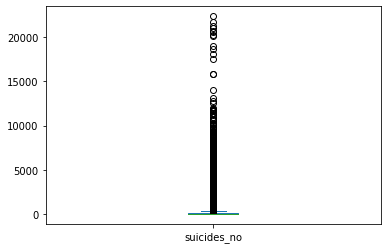

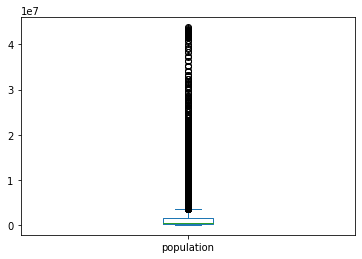

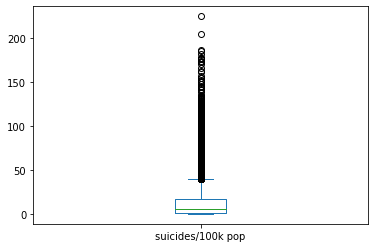

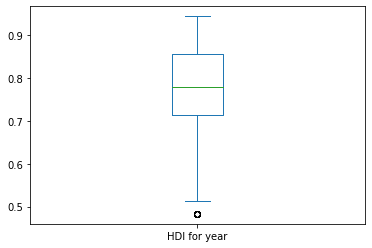

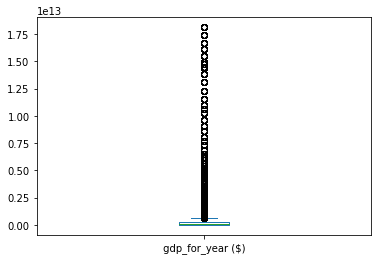

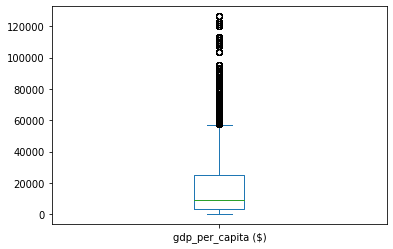

In [ ]:
for i in indices_c:
  df[df.columns[i]].dropna().plot.box() #plotting box and whiskers plot as a method of pandas dataframe
  pyplot.show()

suicides_no


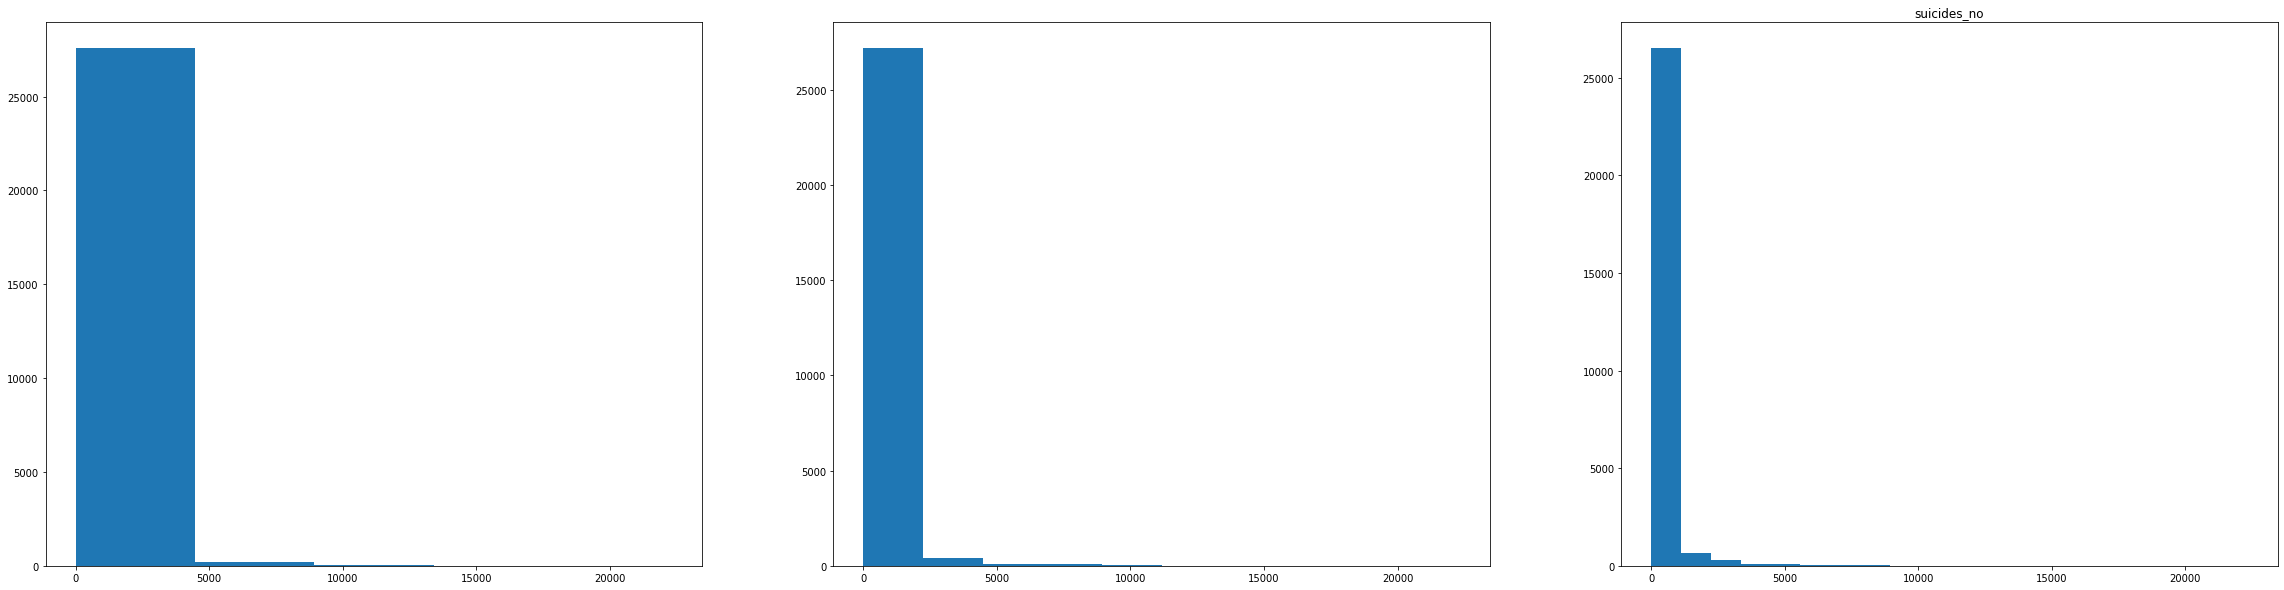

population


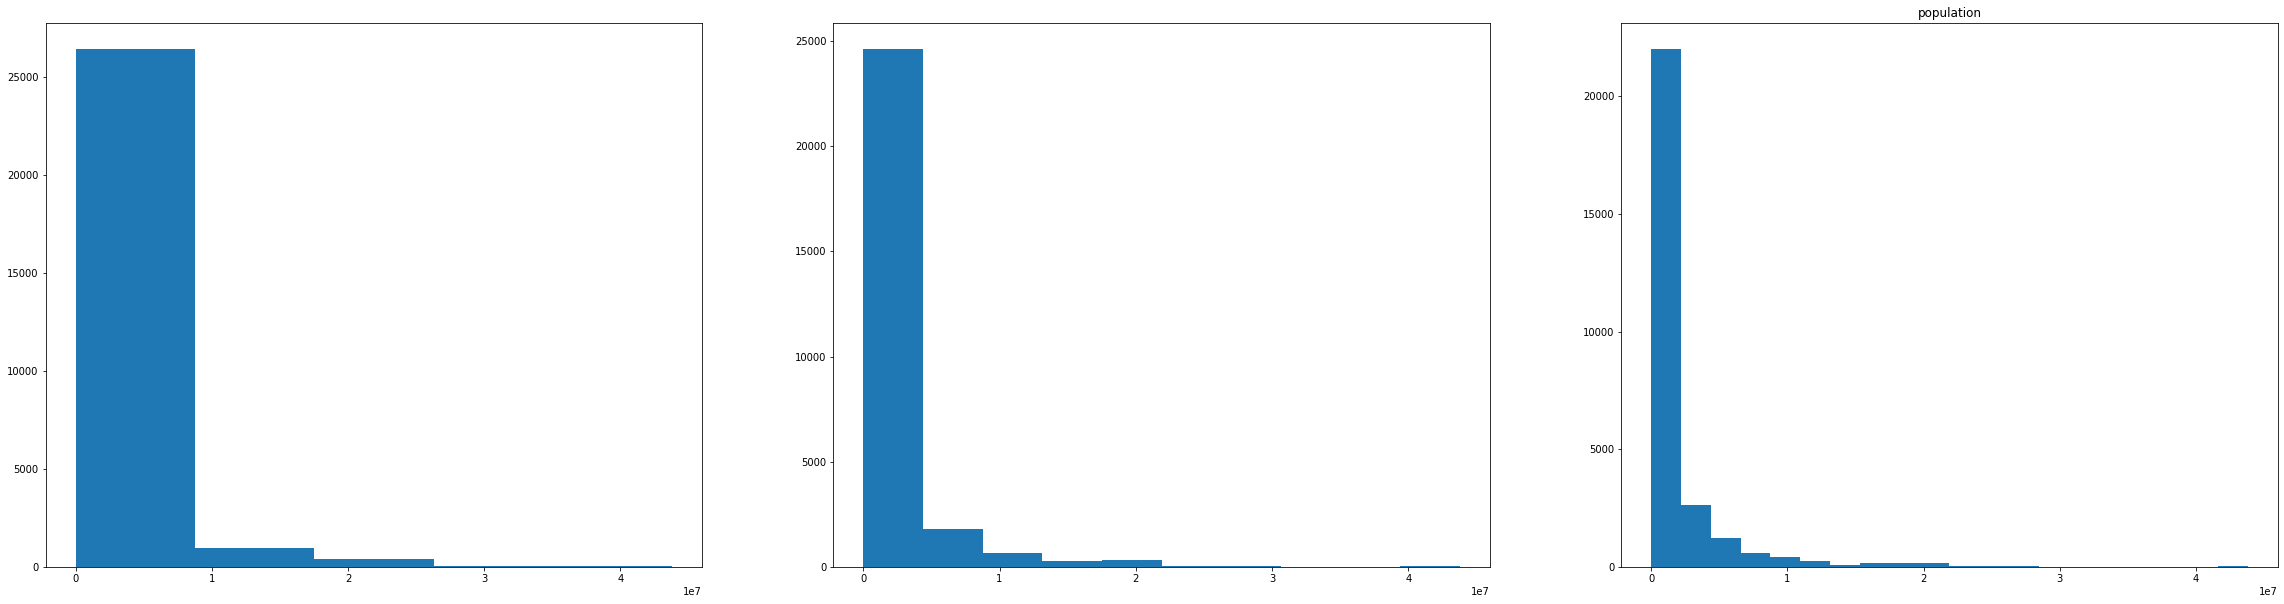

suicides/100k pop


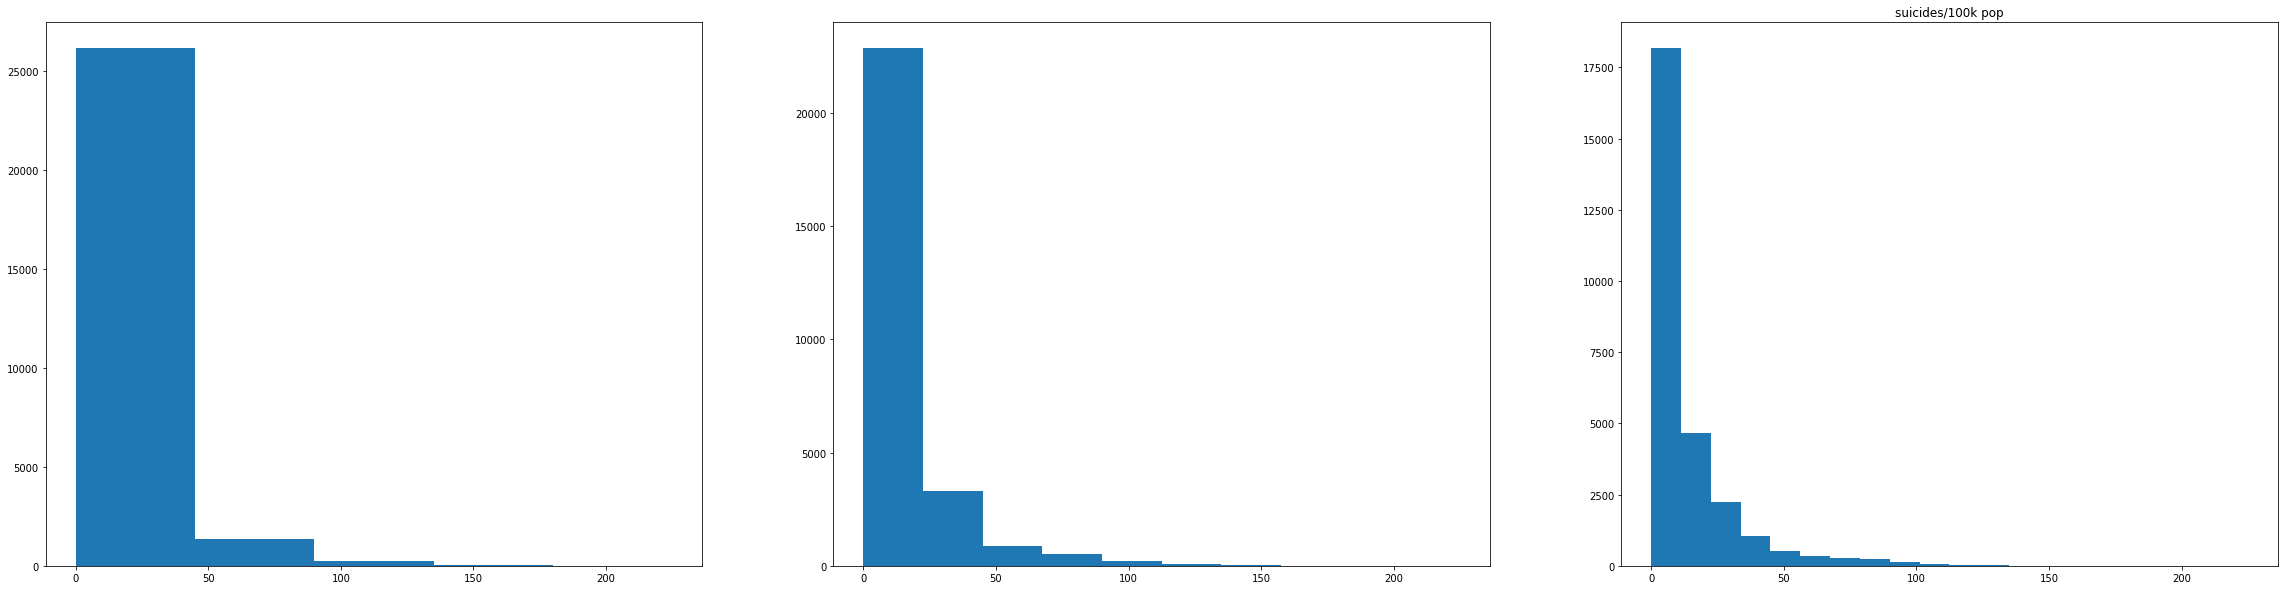

HDI for year


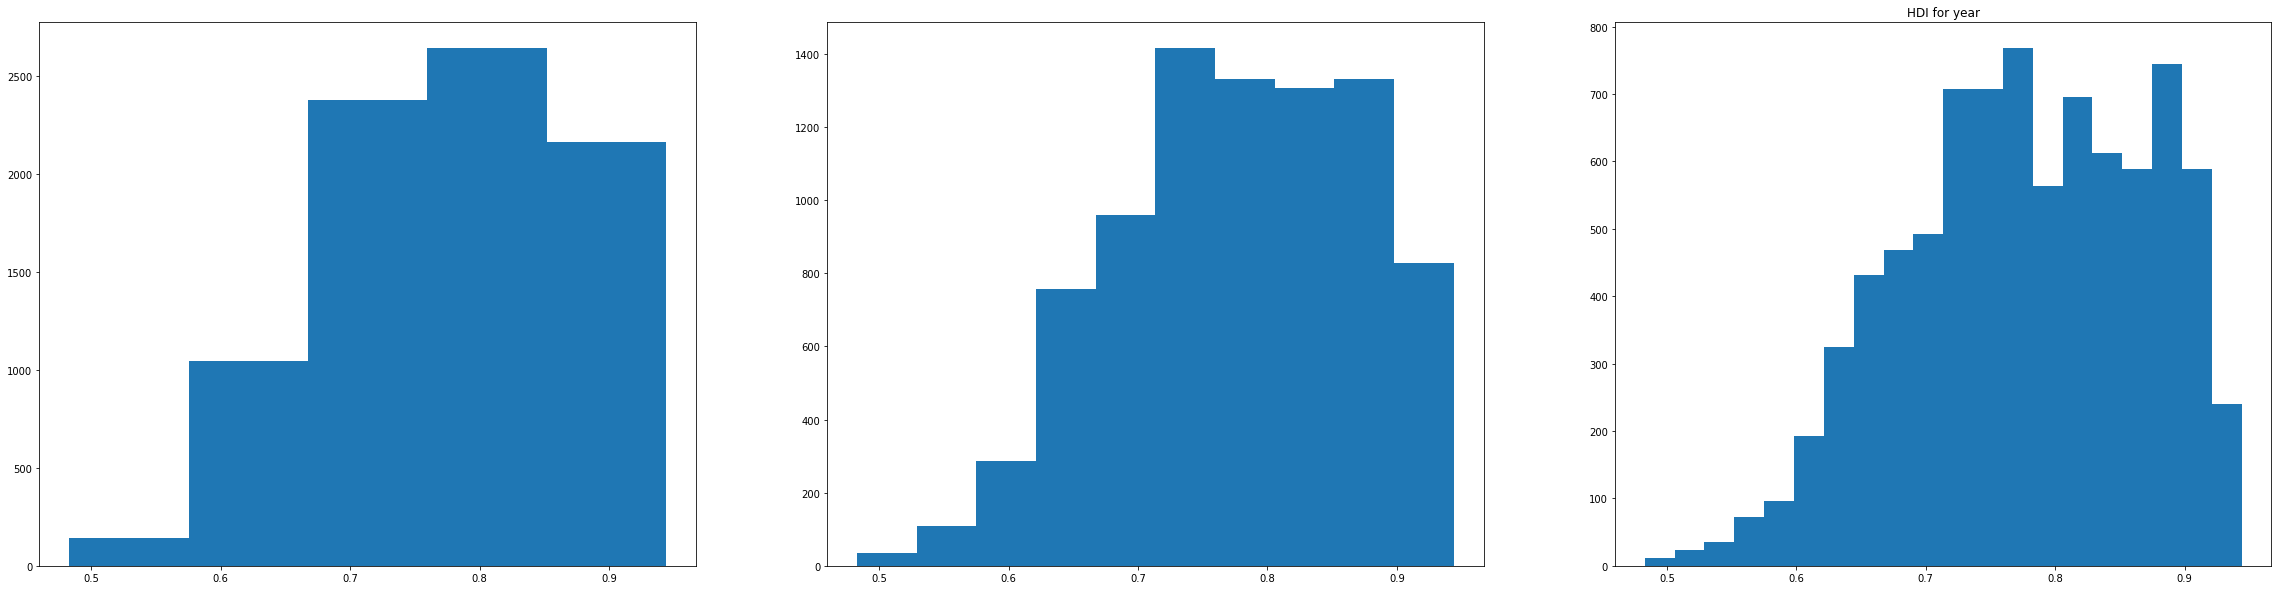

 gdp_for_year ($) 


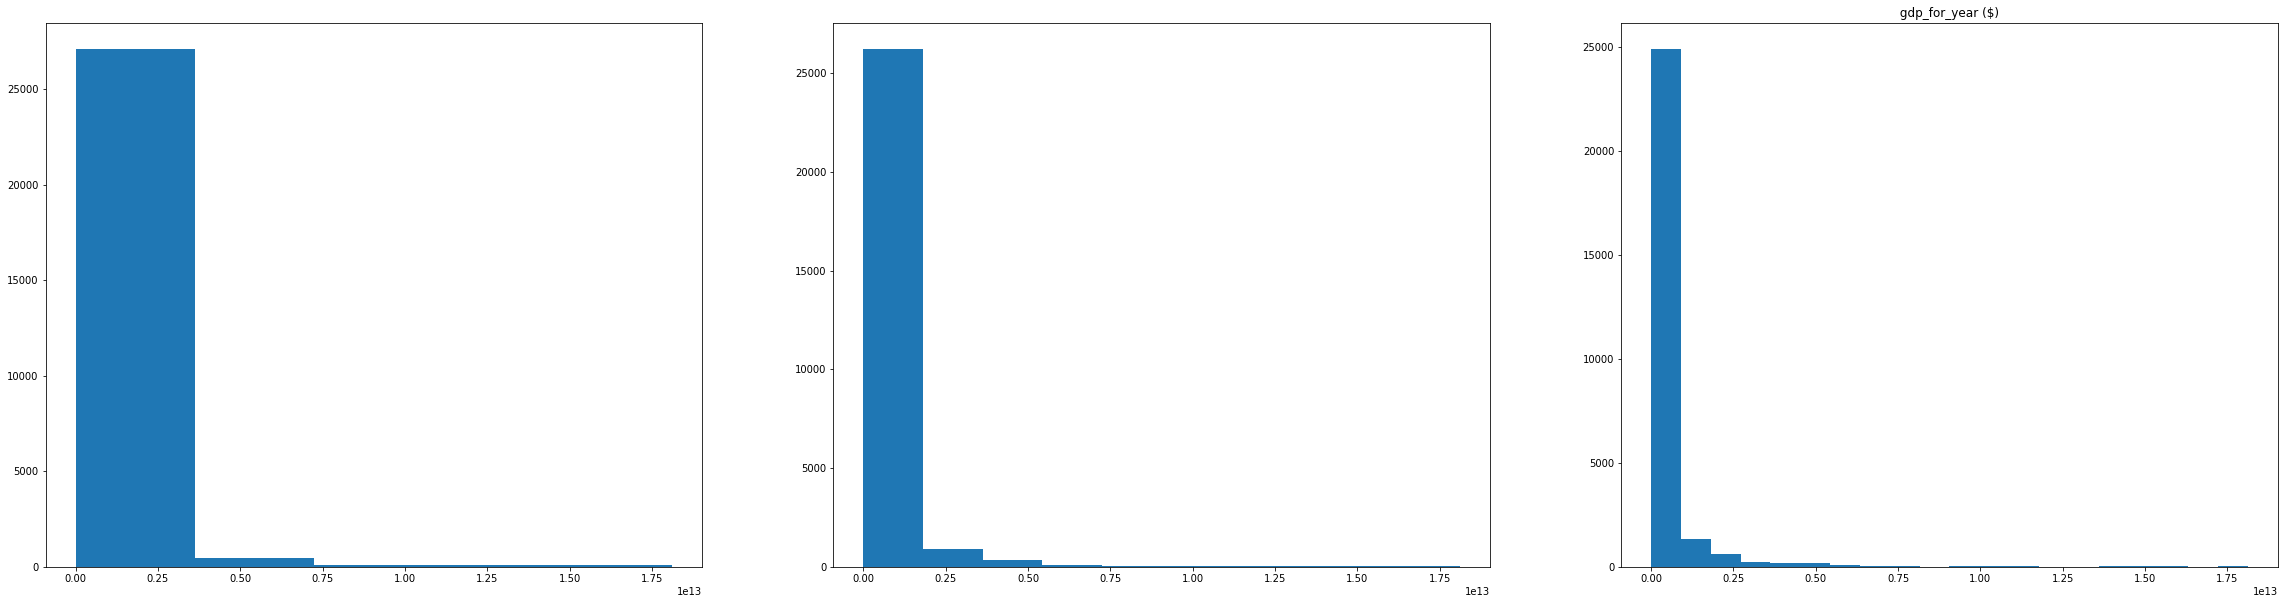

gdp_per_capita ($)


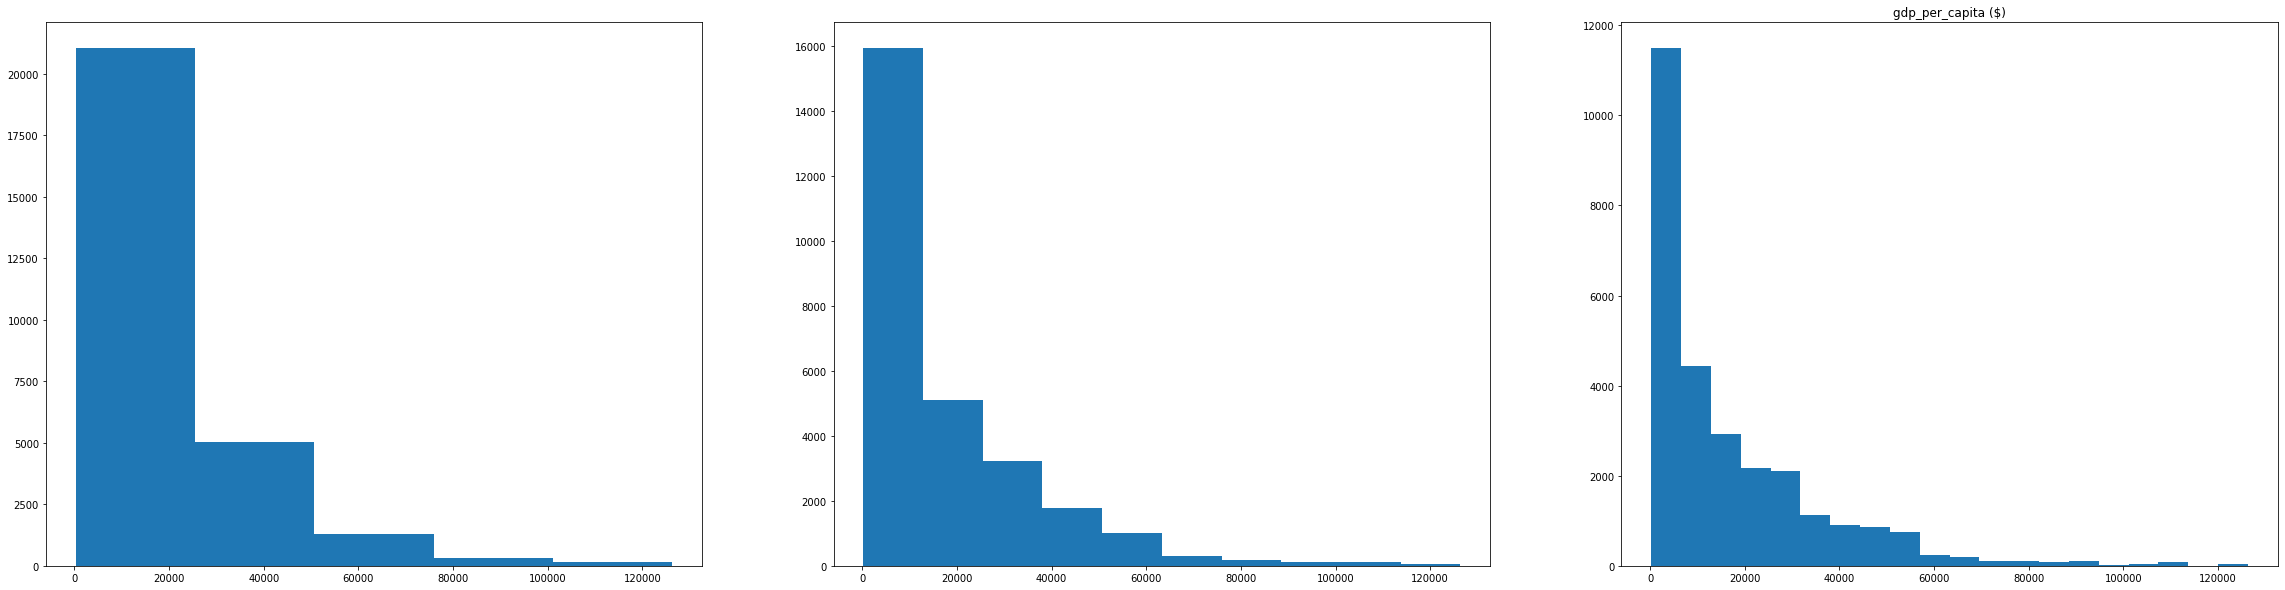

In [ ]:
for i in indices_c:
  print(df.columns[i])
  fig,axis=pyplot.subplots(1,3) #cretae subplots to show all three histograms side by side
  #axis[0].hist(df[df.columns[i]],min(5,len(df[df.columns[i]].unique())//2))
  axis[0].hist(df[df.columns[i]],5) #histogram with 5 bins
  axis[1].hist(df[df.columns[i]],10) #histogram with 10 bins
  axis[2].hist(df[df.columns[i]],20) #histogram with 20 bins
  fig.set_figwidth(40) #changing figure width to accomodate all three subplots properly
  fig.set_figheight(10)
  pyplot.title(df.columns[i])
  pyplot.show()

#<h3> Question 1d </h3>

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


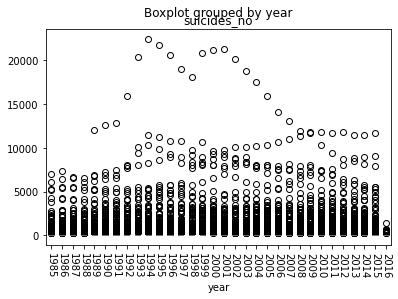

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


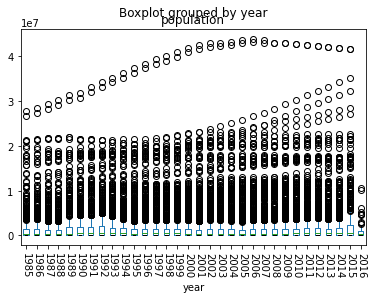

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


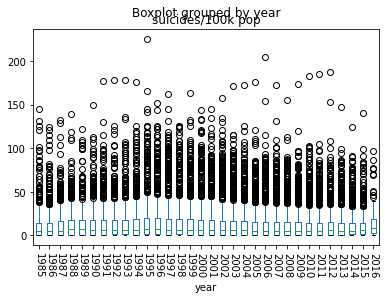

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


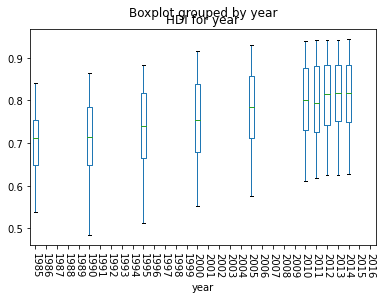

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


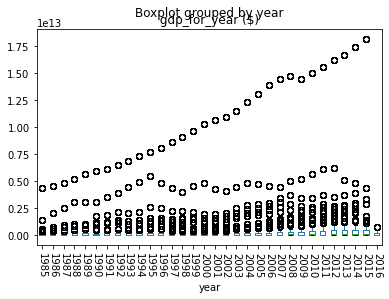

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


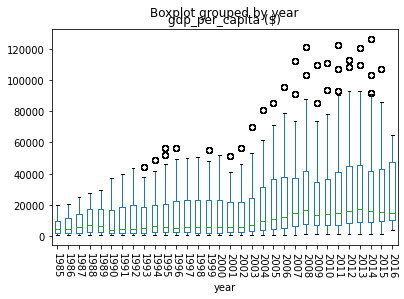

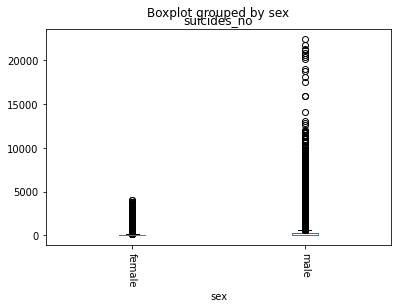

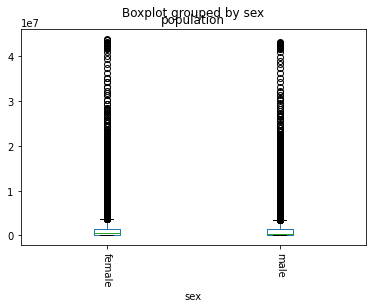

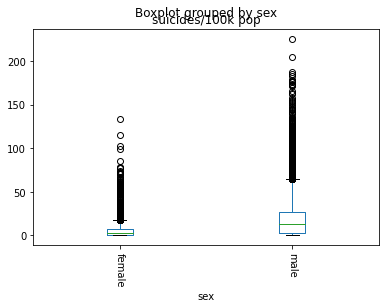

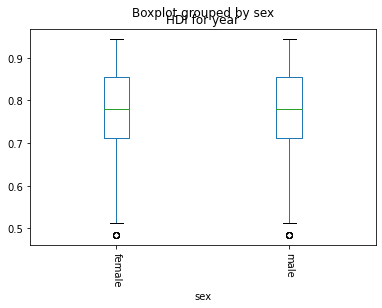

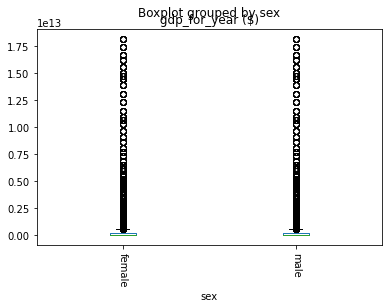

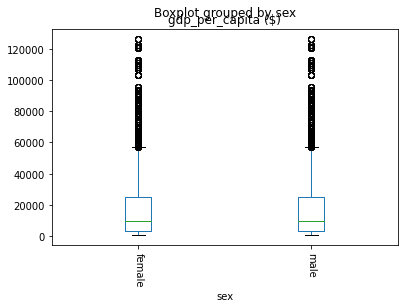

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


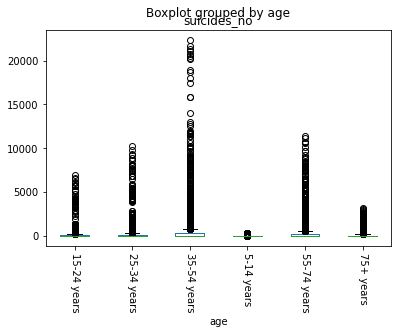

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


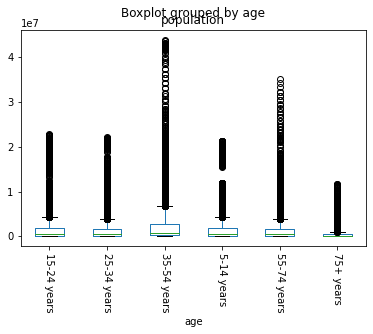

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


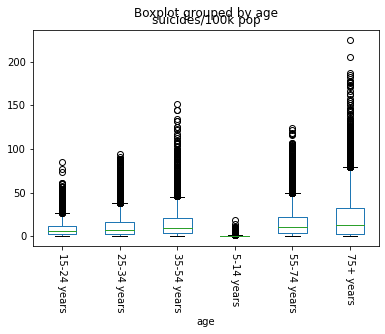

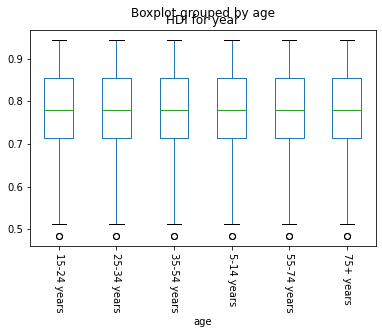

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


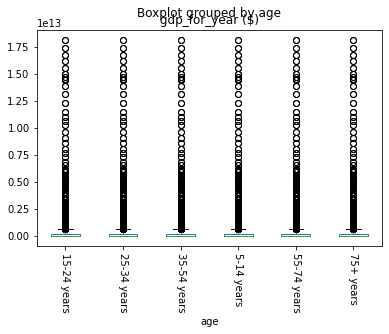

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


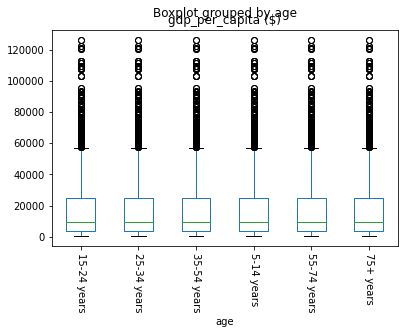

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


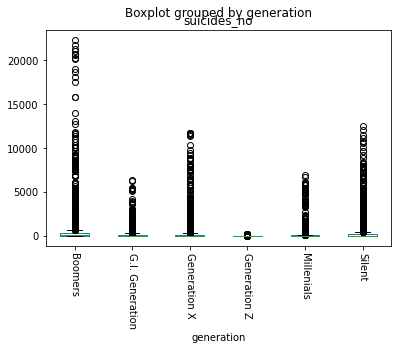

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


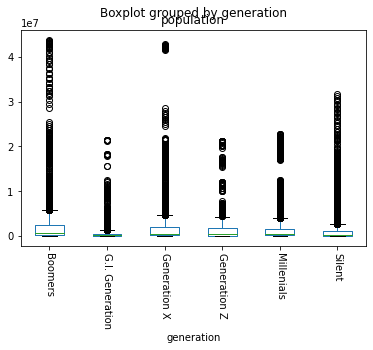

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


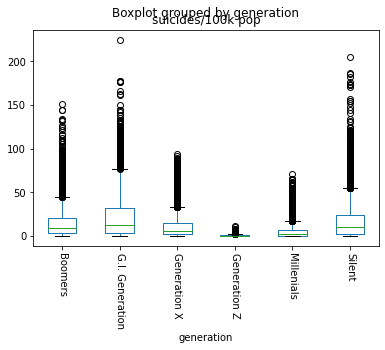

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


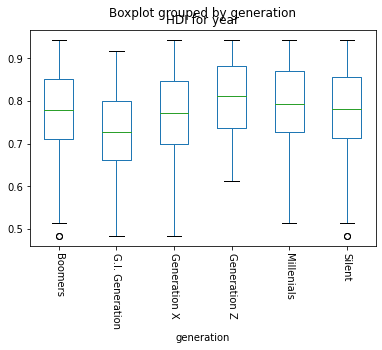

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


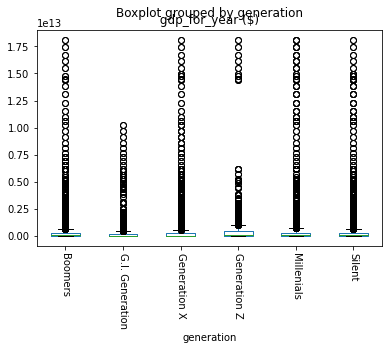

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


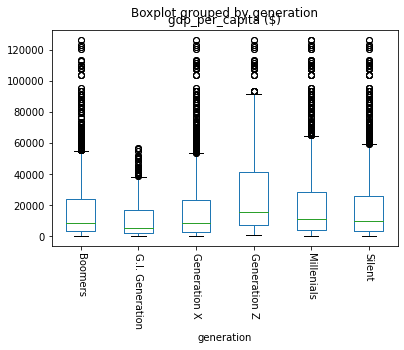

In [ ]:
for i in indices_d[1:]: #loop over discrete 
  for j in indices_c: #loop over continuous 
    df.boxplot(by=df.columns[i],column=df.columns[j],grid=False) #box and whiskers plot of the continuous variable categorized by the discrete variable
    pyplot.xticks(rotation=270) #rotate xticks
    pyplot.show()
    fig.set_figwidth(20)

Avoided plotting by grouping by country because there are 101 distinct countries

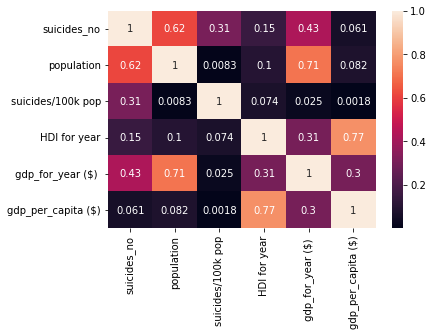

In [ ]:
temp_df=pd.DataFrame() #create a temporary dataframe that will only have continuous variables 
for i in indices_c:
  temp_df[df.columns[i]]=df[df.columns[i]]
sb.heatmap(temp_df.corr(),annot=True) #use corr matrix on this new dataframe

Most of the columns are not well correlated. Population size and GDP are well correlated. HDI and gdp per capita are well correlated. Bound to happend due to economic factors 

#<h1>Question 2</h1>

#<h3>Question 2a</h3>

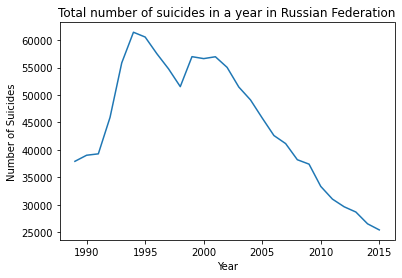

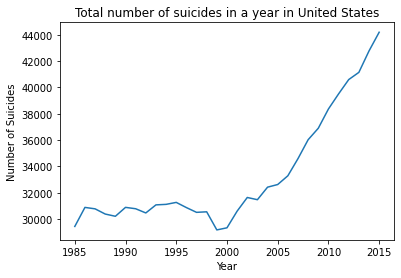

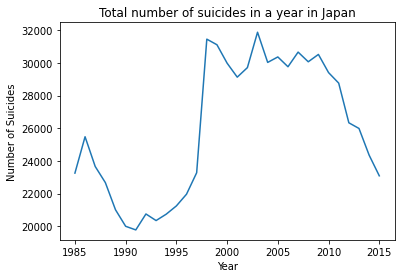

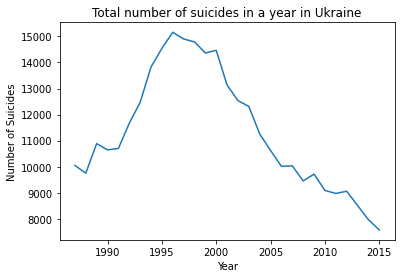

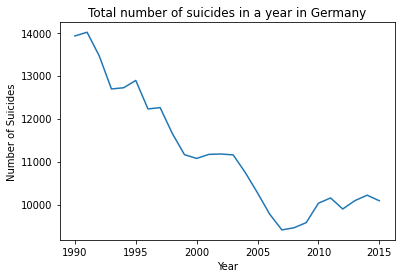

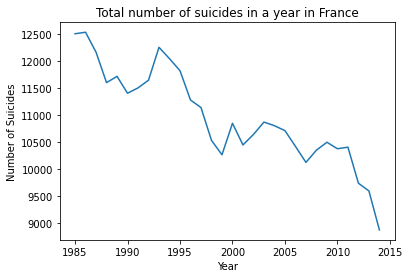

In [ ]:
countries=df.groupby(by='country',as_index=False)['suicides_no'].mean().sort_values(by='suicides_no',ascending=False)[:6]['country'].values
#get countries by getting values of the first 6 entries when sorted in ascending order by avg no. of suicides which on the data grouped by country  
for i in countries:  #iterate over these countries
  country_df=df[df['country']==i] #isolate values of a country
  pyplot.plot(country_df['year'].unique(),country_df.groupby('year')['suicides_no'].sum()) #plot years and the total no. grouped by country
  #display(country_df)
  pyplot.title('Total number of suicides in a year in '+i) #appropriate title
  pyplot.xlabel('Year')
  pyplot.ylabel('Number of Suicides')
  pyplot.show()

  print('\n')

5/6 nations have witnessd decrease in sucides in the recent years. US on the other hand has seen a steady growth in number of suicides

#<h3>Question 2b</h3>

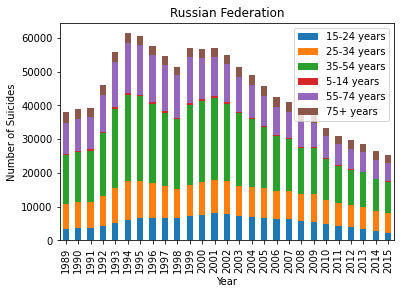

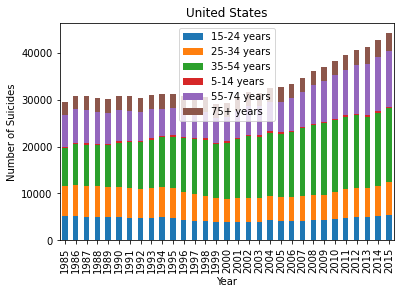

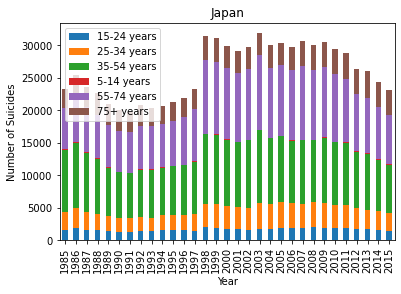

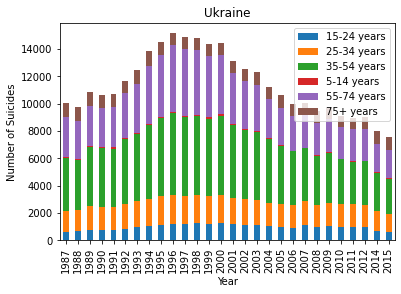

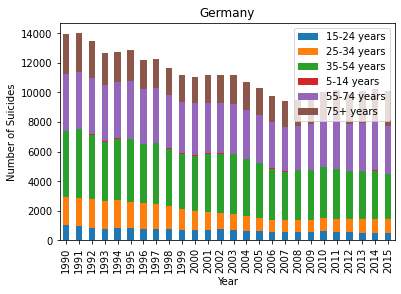

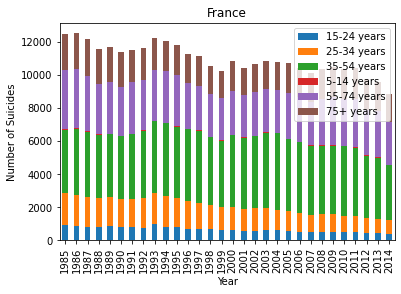

In [ ]:
#following is done to get a dataframe where age groups and year are columns
for k in countries: #iterate over countries found before
  country_df=df[df['country']==k] #isolate data based on country
  t=country_df.groupby(['year','age'],as_index=False)['suicides_no'].sum() #group and sum data based on years and age group
  new_df=pd.DataFrame() #temporary dataframe
  dic={}
  for i in t['year'].unique(): #loop over years
    for j in t['age'].unique(): #loop over age groups
      try:
        dic[j] #check if the age group has been initialsed as a key
      except:
        dic[j]=[] #initialise age group as a key
      tt=t[t['year']==i] #isolate data based on year
      new_df['year']=t['year'].unique() #initialise the year column
      dic[j].append(tt[tt['age']==j]['suicides_no'].values[0]) #to the dictionary add suicides of the particular age group
  
  for j in t['age'].unique():
    new_df[j]=dic[j] #initialise the age group column
  
  new_df.plot(x='year',kind='bar',stacked=True) #plot stacked bar graph
  pyplot.title(k)
  pyplot.xlabel('Year')
  pyplot.ylabel('Number of Suicides')
  pyplot.show()

35-54 age group is the major contributer in all nations and age group 5-14 is the least contributer

#<h3>Question 2c</h3>

The Ratio of difference in number of men and women committing suicide to total number is quite conssitent with a standard deviation of 0.038882243419958655


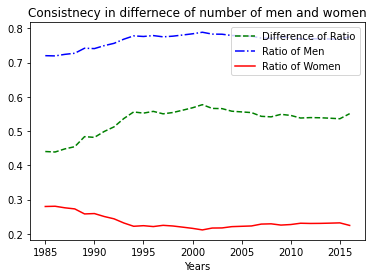

In [ ]:
temp_df=df.groupby(['year','sex'])['suicides_no'].sum() #grouped data
a,b,c=[],[],[] #lists to store the ratios
years=np.sort(df['year'].unique()) #sorted list of years

for i in years:
  a.append((temp_df[i,'male']-temp_df[i,'female'])/(temp_df[i,'male']+temp_df[i,'female'])) #difference in men and women / total no.
  b.append(temp_df[i,'male']/(temp_df[i,'male']+temp_df[i,'female'])) #ratio of male suicides
  c.append(temp_df[i,'female']/(temp_df[i,'male']+temp_df[i,'female'])) #ratio of femlae suicides

pyplot.plot(years,a,color='green',ls='--',label='Difference of Ratio') #plot line graphs

pyplot.plot(years,b,color='blue',ls='-.',label='Ratio of Men')

pyplot.plot(years,c,color='red',label='Ratio of Women')

pyplot.legend(loc=0)

pyplot.title('Consistnecy in differnece of number of men and women') 
pyplot.xlabel('Years')
#print(a,b,c,sep='\n')
print('The Ratio of difference in number of men and women committing suicide to total number is quite conssitent with a standard deviation of',np.array(a).std())

The ratio of difference is quite consistent around the 0.5 mark. The ratio of men is around 0.75 and women is 0.25. That is almost every year number of men committing suicide is thrice the number of women 

#<h3>Question 2d</h3>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


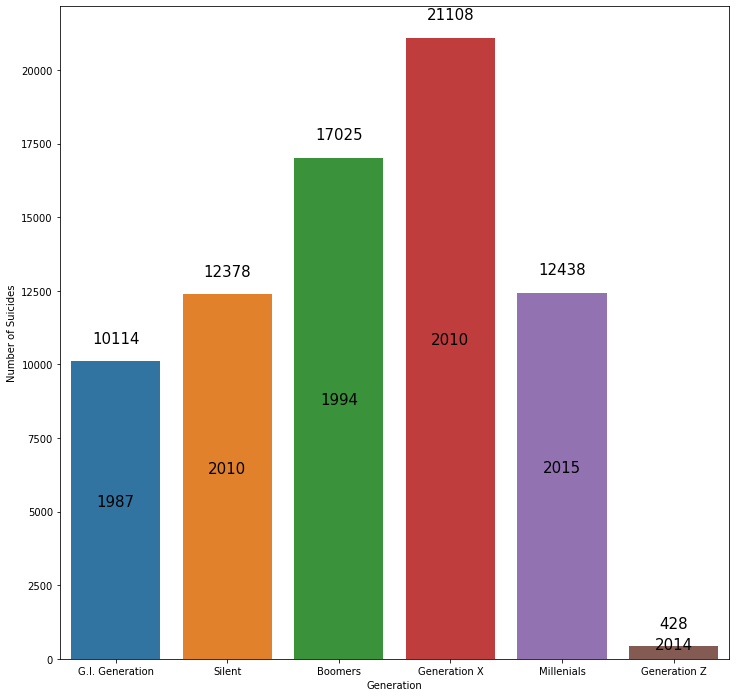

In [ ]:
temp_df=df[df['country']=='United States'].groupby(['generation','year'])['suicides_no'].sum() #data of US grouped by generation and year
#display(df[df['country']=='United States'].groupby(['generation','year'],as_index=False)['suicides_no'].sum())
index=[]
generations,years,suicides=[],[],[] #temporary lists
for i in ['G.I. Generation' ,'Silent' ,'Boomers' ,'Generation X' ,'Millenials','Generation Z']: #loop over generations
  min=[index,0]
  for j in df['year'].unique(): #loop over years
    try: 
      if temp_df[i,j]>min[1]: #if the current iteration has higher number of suicides
        min[0]=[i,j] #change the year
        min[1]=temp_df[i,j] #change the number of suicides
    except KeyError : #if a year is not is not valid for a generation eg Gen Z didnt exist in 1985
      pass
  
  generations.append(min[0][0]) #append the relevant values
  years.append(min[0][1])
  suicides.append(min[1])
fig,ax=pyplot.subplots()
plots = sb.barplot(generations,suicides,ax=ax) #plot bar graph
counter=0
for bar in plots.patches:
  plots.annotate(years[counter],(bar.get_x() + bar.get_width() / 2,bar.get_height()/2), ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points') #text for year
  plots.annotate(format(bar.get_height(),'.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()+500), ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points') #text for number of suicides
  counter+=1
pyplot.ylabel('Number of Suicides')
pyplot.xlabel('Generation')
fig.set_figwidth(12)
fig.set_figheight(12)

Sorted according to chronological order of generations. Worst year for lot of generations has happened recently. In its worst year GenX has had the most number of suicides

#<h3>Question 2e</h3>

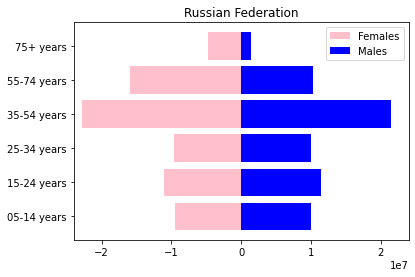

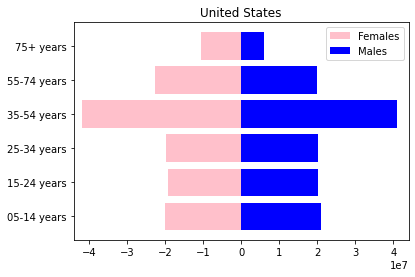

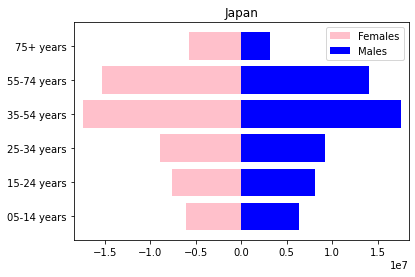

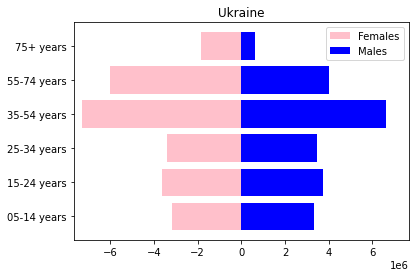

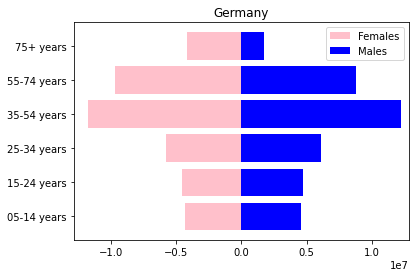

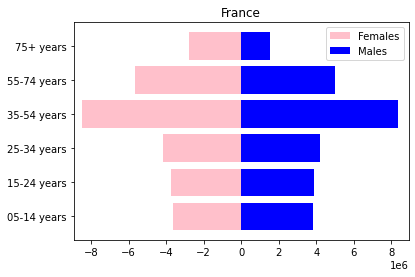

In [ ]:
for country in countries: #loop over top 6 countries as found before
  temp_df=df[df['country']==country] #isolate data by country
  temp_df=temp_df[temp_df['year']==2000] #isolate data for year 2000
  temp_df['age']=temp_df['age'].replace('5-14 years','05-14 years') #replacing beacuse when sorting by string 5-14 is above 35-54 by adding 0 in front 
  temp_df=temp_df.groupby(['sex','age'],as_index=False).sum() #group data by sex and age
  #display(temp_df)

  container1 = pyplot.barh(temp_df['age'][:6],temp_df['population'][:6],color='pink',label='Females') #plot data for females
  container2 = pyplot.barh(temp_df['age'][6:],temp_df['population'][6:],color='blue',label='Males') #plot data for males
  xlim=pyplot.xlim()[1] #the range for x axis
  pyplot.xlim(-xlim,xlim) #extend the axis to both sides so we can reflect one side
  
  for p in container1.patches: #loop over bars for femlaes
    
    p.set_width(-p.get_width()) #reflect the bars
  
  pyplot.title(country)
  pyplot.legend()
  pyplot.show()
  print('\n')

Population is evenly distributed in younger age groups. In 75+ agae group women are consistently more than men

#<h3>Question 2f</h3>

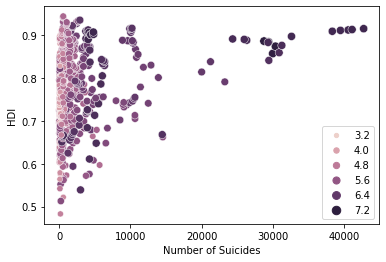

In [ ]:
group_df=df.dropna().groupby(['country','year']) #HDI depends on country and year so group by these
temp_df=group_df.sum() #sum the number of suicides
grps=group_df.groups

suicides=temp_df['suicides_no']
hdis=[] #new arrays to store HDI and population of country in the given year
popln=[]
for i in grps.keys(): #iterate over the groups formed in groupby
  hdis.append(df.iloc()[grps[i][0]]['HDI for year']) #grps[i][0] gives the index of the first element in the group
  popln.append(log10(df.iloc()[grps[i][0]]['population'])) #take log base transform

sb.scatterplot(x=suicides,y=hdis,size=popln,hue=popln) #bubble plot from seaborn 
pyplot.ylabel('HDI')
pyplot.xlabel('Number of Suicides')
pyplot.show()

Countries with the highest number of suicides also happen to have high HDI. Countries with low HDI usually have low population but consistently have less number of suicides